# Aufgabe 2 - Tiefe Einblicke ins Institut

Den Code immer nachvollziehbar kommentieren! Bitte beachtet, dass das Notebook von Anfang bis Ende ohne Fehler durchlaufen muss und dass die requirements.txt Datei aktualisiert wird. 

## Teilaufgabe a): Trainings-und Testdatenset

In [1]:
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

import numpy as np
import cv2
import matplotlib.pyplot as plt



In [ ]:

training_path_list = [[],[],[],[]]  # ["./pfad/zu/bildA.png","./pfad/zu/bildB.png",...]
test_path_list = [[],[],[],[]]  # ["./pfad/zu/bildC.png","./pfad/zu/bildD.png",...]

# Erstellt Trainingslisten für die Räume
def training_list():
    for i in range(20):
        training_path_list[0].append(f"./Bilder/Flur/Flur{i+1}.jpg")
    for i in range(20):
        training_path_list[1].append(f"./Bilder/Labor/Labor{i+1}.jpg")
    for i in range(20):
        training_path_list[2].append(f"./Bilder/Professorenbuero/Professorenbuero{i+1}.jpg")
    for i in range(20):
        training_path_list[3].append(f"./Bilder/Teekueche/Teekueche{i+1}.jpg")

# Erstellt Testlisten für die Räume
def test_list():
    for i in range(5):
        test_path_list[0].append(f"./Bilder/Flur/Flur{i+21}.jpg")
    for i in range(5):
        test_path_list[1].append(f"./Bilder/Labor/Labor{i+21}.jpg")
    for i in range(5):
        test_path_list[2].append(f"./Bilder/Professorenbuero/Professorenbuero{i+21}.jpg")
    for i in range(5):
        test_path_list[3].append(f"./Bilder/Teekueche/Teekueche{i+21}.jpg")

training_list()
test_list()
print(test_path_list)

try:
    image = Image.open(training_path_list[0][0])
except:
    raise ValueError("Ihr müsst einmal dieses Lageplan.png bei /usr/lageplan.png einfügen")

    

[['./Bilder/Flur/Flur21.jpg', './Bilder/Flur/Flur22.jpg', './Bilder/Flur/Flur23.jpg', './Bilder/Flur/Flur24.jpg', './Bilder/Flur/Flur25.jpg'], ['./Bilder/Labor/Labor21.jpg', './Bilder/Labor/Labor22.jpg', './Bilder/Labor/Labor23.jpg', './Bilder/Labor/Labor24.jpg', './Bilder/Labor/Labor25.jpg'], ['./Bilder/Professorenbuero/Professorenbuero21.jpg', './Bilder/Professorenbuero/Professorenbuero22.jpg', './Bilder/Professorenbuero/Professorenbuero23.jpg', './Bilder/Professorenbuero/Professorenbuero24.jpg', './Bilder/Professorenbuero/Professorenbuero25.jpg'], ['./Bilder/Teekueche/Teekueche21.jpg', './Bilder/Teekueche/Teekueche22.jpg', './Bilder/Teekueche/Teekueche23.jpg', './Bilder/Teekueche/Teekueche24.jpg', './Bilder/Teekueche/Teekueche25.jpg']]


## Teilaufgabe b): Verteilung RGB

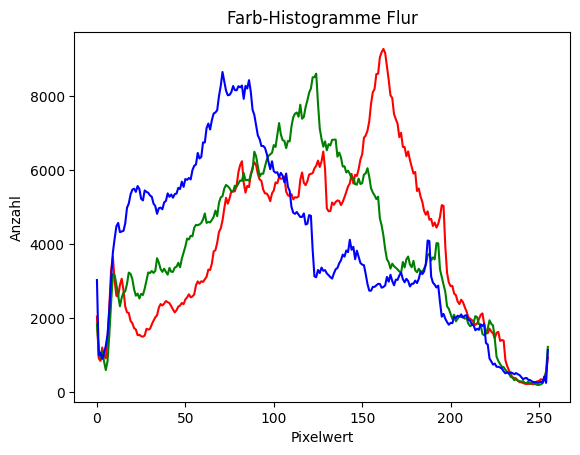

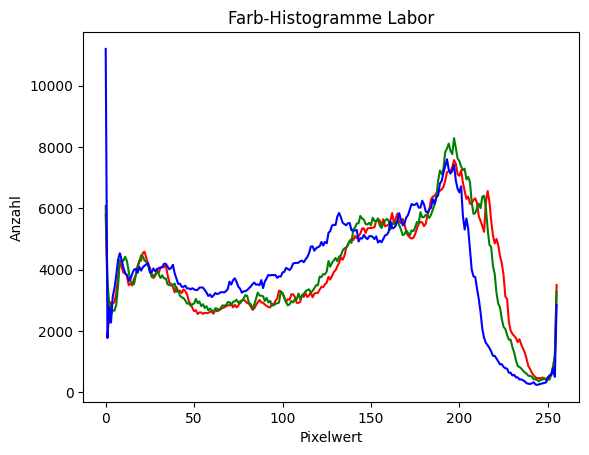

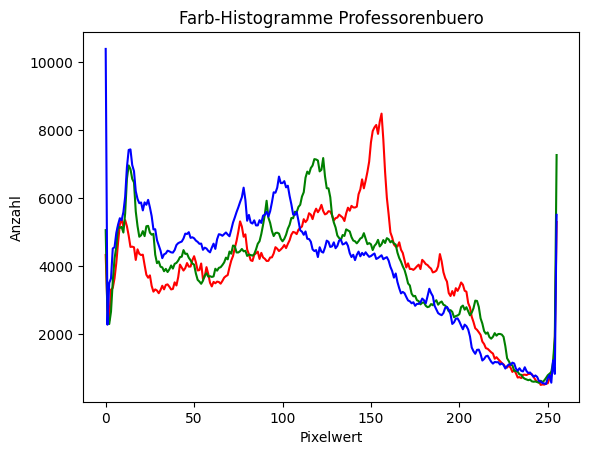

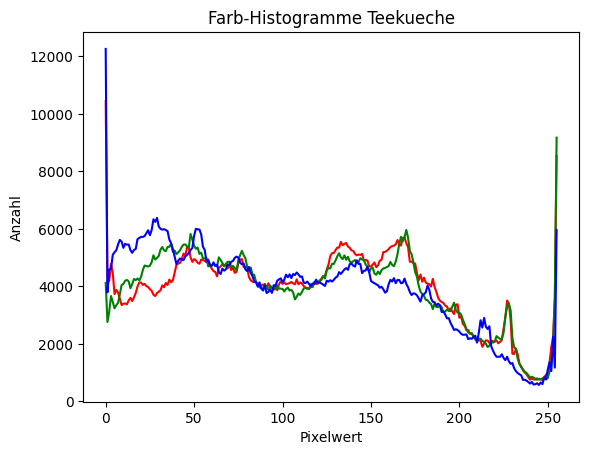

In [ ]:

Klassen = ["Flur", "Labor", "Professorenbuero", "Teekueche"]

# Rechnet RGB Verteilung der Bilder aus, packt Werte in Liste je Klasse
for j in range(4):
    colorList = []
    for i in training_path_list[j]:
        image = cv2.imread(i)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR-Format zu RGB konvertieren
        colorList.append(image.reshape(-1, 3))

    # Histogramme für einzelne Klassen geplottet
    colorList = np.vstack(colorList)
    colors = ("r", "g", "b")
    plt.title("Farb-Histogramme " + Klassen[j])
    for k, color in enumerate(colors):
        hist, _ = np.histogram(colorList[:, k], bins=256, range=(0, 256))
        plt.plot(hist, color=color)
        
    plt.xlabel("Pixelwert")
    plt.ylabel("Anzahl")
    plt.show()


## Teilaufgabe c): Training und Test mit Random Forest 

In [ ]:

X = []  # Merkmale
y = []  # Labels (0, 1, 2, 3)

# Trainingsdaten (alle aus training_path_list)
for label, bild_liste in enumerate(training_path_list):
    for pfad in bild_liste:
        image = cv2.imread(pfad)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Erstellt Feature Vector mit Daten aus Histogram
        hist_r = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
        hist_b = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()
        feature_vector = np.concatenate([hist_r, hist_g, hist_b])

        X.append(feature_vector)
        y.append(label)

# Klassifikator trainieren
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Testdaten aus test_path_list (manuell)
y_true = []
y_pred = []

for j, klasse in enumerate(Klassen):
    for pfad in test_path_list[j]:
        image = cv2.imread(pfad)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Erstellt Feature Vector mit Daten aus Histogram, wendet reshape an
        hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=(0, 256))
        hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=(0, 256))
        hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=(0, 256))
        feature_vector = np.concatenate([hist_r, hist_g, hist_b]).reshape(1, -1)

        pred_label = clf.predict(feature_vector)[0]

        y_true.append(j)
        y_pred.append(pred_label)

        # Falsche Vorhersage
        if pred_label != j:
            print(f"❌ Fehler bei {pfad.split('/')[-1]}: Vorhergesagt {Klassen[pred_label]}, sollte aber {klasse} sein.")

# Klassifikationsbericht für das Testset
print(classification_report(y_true, y_pred, target_names=Klassen))
correct = sum([yt == yp for yt, yp in zip(y_true, y_pred)])
total = len(y_true)
print(f"Accuracy: {correct}/{total} = {correct/total:.2%}")
print(clf.get_params())


❌ Fehler bei Flur25.jpg: Vorhergesagt Professorenbuero, sollte aber Flur sein.
❌ Fehler bei Labor22.jpg: Vorhergesagt Teekueche, sollte aber Labor sein.
❌ Fehler bei Professorenbuero22.jpg: Vorhergesagt Teekueche, sollte aber Professorenbuero sein.
❌ Fehler bei Professorenbuero24.jpg: Vorhergesagt Labor, sollte aber Professorenbuero sein.
❌ Fehler bei Teekueche21.jpg: Vorhergesagt Professorenbuero, sollte aber Teekueche sein.
❌ Fehler bei Teekueche24.jpg: Vorhergesagt Labor, sollte aber Teekueche sein.
                  precision    recall  f1-score   support

            Flur       1.00      0.80      0.89         5
           Labor       0.67      0.80      0.73         5
Professorenbuero       0.60      0.60      0.60         5
       Teekueche       0.60      0.60      0.60         5

        accuracy                           0.70        20
       macro avg       0.72      0.70      0.70        20
    weighted avg       0.72      0.70      0.70        20

Accuracy: 14/20 = 70.00%


## Teilaufgabe d): Hyperparameteroptimierung

In [ ]:


# X und y aus deinem bisherigen Code

# 1 Hyperparameter + 3 Werte (z. B. max_depth)
param_grid = {
    'max_depth': [10, 20, None]



  # Beispielwerte
}

# RandomForest-Classifier (ohne max_depth gesetzt)
base_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Stratified 5-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=base_clf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Beste Parameter und Genauigkeit
print("✅ Beste Parameter:", grid_search.best_params_)
print("📈 Beste Cross-Validation-Accuracy:", grid_search.best_score_)


X = []  # Merkmale
y = []  # Labels (0, 1, 2, 3)

# Trainingsdaten (alle aus training_path_list)
for label, bild_liste in enumerate(training_path_list):
    for pfad in bild_liste:
        image = cv2.imread(pfad)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Erstellt Feature Vector mit Daten aus Histogram
        hist_r = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
        hist_b = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()
        feature_vector = np.concatenate([hist_r, hist_g, hist_b])

        X.append(feature_vector)
        y.append(label)

# Klassifikator trainieren
clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
clf.fit(X, y)

# Testdaten aus test_path_list (manuell)
y_true = []
y_pred = []

for j, klasse in enumerate(Klassen):
    for pfad in test_path_list[j]:
        image = cv2.imread(pfad)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Erstellt Feature Vector mit Daten aus Histogram, wendet reshape an
        hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=(0, 256))
        hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=(0, 256))
        hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=(0, 256))
        feature_vector = np.concatenate([hist_r, hist_g, hist_b]).reshape(1, -1)

        pred_label = clf.predict(feature_vector)[0]

        y_true.append(j)
        y_pred.append(pred_label)

        if pred_label != j:
            print(f"❌ Fehler bei {pfad.split('/')[-1]}: Vorhergesagt {Klassen[pred_label]}, sollte aber {klasse} sein.")

# Klassifikationsbericht für das Testset
print(classification_report(y_true, y_pred, target_names=Klassen))
correct = sum([yt == yp for yt, yp in zip(y_true, y_pred)])
total = len(y_true)
print(f"Accuracy: {correct}/{total} = {correct/total:.2%}")
print(clf.get_params())



✅ Beste Parameter: {'max_depth': 10}
📈 Beste Cross-Validation-Accuracy: 0.6375
❌ Fehler bei Flur25.jpg: Vorhergesagt Professorenbuero, sollte aber Flur sein.
❌ Fehler bei Labor22.jpg: Vorhergesagt Teekueche, sollte aber Labor sein.
❌ Fehler bei Professorenbuero22.jpg: Vorhergesagt Teekueche, sollte aber Professorenbuero sein.
❌ Fehler bei Professorenbuero24.jpg: Vorhergesagt Labor, sollte aber Professorenbuero sein.
❌ Fehler bei Teekueche21.jpg: Vorhergesagt Professorenbuero, sollte aber Teekueche sein.
❌ Fehler bei Teekueche24.jpg: Vorhergesagt Labor, sollte aber Teekueche sein.
                  precision    recall  f1-score   support

            Flur       1.00      0.80      0.89         5
           Labor       0.67      0.80      0.73         5
Professorenbuero       0.60      0.60      0.60         5
       Teekueche       0.60      0.60      0.60         5

        accuracy                           0.70        20
       macro avg       0.72      0.70      0.70        20
    w

## Teilaufgabe e): Dimensionalitätsreduktion

In [ ]:

X = []  # Merkmale
y = []  # Labels

# Trainingsdaten vorbereiten
for label, bild_liste in enumerate(training_path_list):
    for pfad in bild_liste:
        image = cv2.imread(pfad)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Erstellt Feature Vector mit Daten aus Histogram
        hist_r = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
        hist_b = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()

        feature_vector = np.concatenate([hist_r, hist_g, hist_b])
        X.append(feature_vector)
        y.append(label)

# PCA (z. B. auf 50 Komponenten)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Klassifikator trainieren mit reduzierten Features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_pca, y)

# Testdaten aus test_path_list
y_true = []
y_pred = []

for j, klasse in enumerate(Klassen):
    for pfad in test_path_list[j]:
        image = cv2.imread(pfad)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Erstellt Feature Vector mit Daten aus Histogram, wendet reshape an
        hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=(0, 256))
        hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=(0, 256))
        hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=(0, 256))
        feature_vector = np.concatenate([hist_r, hist_g, hist_b]).reshape(1, -1)

        # ➕ PCA auf Testvektor anwenden (mit transform, nicht fit_transform!)
        feature_vector_pca = pca.transform(feature_vector)

        pred_label = clf.predict(feature_vector_pca)[0]

        y_true.append(j)
        y_pred.append(pred_label)

        if pred_label != j:
            print(f"❌ Fehler bei {pfad.split('/')[-1]}: Vorhergesagt {Klassen[pred_label]}, sollte aber {klasse} sein.")

# Klassifikationsbericht
print(classification_report(y_true, y_pred, target_names=Klassen))
correct = sum([yt == yp for yt, yp in zip(y_true, y_pred)])
total = len(y_true)
print(f"Accuracy: {correct}/{total} = {correct/total:.2%}")
print(clf.get_params())

pca = PCA(n_components=0.95)  # behält 95% der Varianz
X_pca = pca.fit_transform(X)
print(f"Reduziert auf {X_pca.shape[1]} Komponenten")



❌ Fehler bei Flur23.jpg: Vorhergesagt Labor, sollte aber Flur sein.
❌ Fehler bei Labor21.jpg: Vorhergesagt Teekueche, sollte aber Labor sein.
❌ Fehler bei Labor22.jpg: Vorhergesagt Teekueche, sollte aber Labor sein.
❌ Fehler bei Labor25.jpg: Vorhergesagt Professorenbuero, sollte aber Labor sein.
❌ Fehler bei Professorenbuero22.jpg: Vorhergesagt Teekueche, sollte aber Professorenbuero sein.
❌ Fehler bei Professorenbuero23.jpg: Vorhergesagt Teekueche, sollte aber Professorenbuero sein.
❌ Fehler bei Professorenbuero24.jpg: Vorhergesagt Flur, sollte aber Professorenbuero sein.
❌ Fehler bei Teekueche25.jpg: Vorhergesagt Flur, sollte aber Teekueche sein.
                  precision    recall  f1-score   support

            Flur       0.67      0.80      0.73         5
           Labor       0.67      0.40      0.50         5
Professorenbuero       0.67      0.40      0.50         5
       Teekueche       0.50      0.80      0.62         5

        accuracy                           0.60    